<a href="https://colab.research.google.com/github/ShinyQ/CNN_Messy-Room-Classifier/blob/main/Messy_Room_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Library**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
import zipfile
import os

%matplotlib inline

print("Tensorflow Version :", tf.__version__)

Tensorflow Version : 2.5.0


## **Import And Save Image Dataset**

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-06-17 06:58:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  2.29MB/s    in 34s     

2021-06-17 06:59:06 (1.97 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [5]:
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [7]:
os.listdir('/tmp/images/val')

['messy', 'clean']

### **Seperate Train And Validation Data**

In [8]:
train_clean_dir = os.path.join(train_dir, 'clean')
train_messy_dir = os.path.join(train_dir, 'messy')
 
validation_clean_dir = os.path.join(validation_dir, 'clean')
validation_messy_dir = os.path.join(validation_dir, 'messy')

## **Image Augmentation**

In [11]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

## **Set Training And Validation Image Data**

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=4,
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


## **Setup CNN Model**

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

## **Train Model**

In [17]:
model.fit(train_generator, steps_per_epoch=25, epochs=20, validation_data=validation_generator, validation_steps=5, verbose=2)

Epoch 1/20
25/25 - 7s - loss: 0.7451 - accuracy: 0.4600 - val_loss: 0.6868 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6864 - accuracy: 0.6200 - val_loss: 0.6315 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.6799 - accuracy: 0.6400 - val_loss: 0.6312 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 6s - loss: 0.6374 - accuracy: 0.6900 - val_loss: 0.5162 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 6s - loss: 0.6352 - accuracy: 0.6500 - val_loss: 0.6555 - val_accuracy: 0.6500
Epoch 6/20
25/25 - 6s - loss: 0.6172 - accuracy: 0.6700 - val_loss: 0.5525 - val_accuracy: 0.6500
Epoch 7/20
25/25 - 6s - loss: 0.6398 - accuracy: 0.6400 - val_loss: 0.5759 - val_accuracy: 0.6500
Epoch 8/20
25/25 - 6s - loss: 0.5215 - accuracy: 0.7400 - val_loss: 0.5393 - val_accuracy: 0.7000
Epoch 9/20
25/25 - 6s - loss: 0.5206 - accuracy: 0.7400 - val_loss: 0.6044 - val_accuracy: 0.6500
Epoch 10/20
25/25 - 6s - loss: 0.4585 - accuracy: 0.8100 - val_loss: 0.4209 - val_accuracy: 0.8000
Epoch 11/20
25/25 -

### **Testing Model**

Saving image.jpg to image (1).jpg
image.jpg

Status : Ruangan Rapi



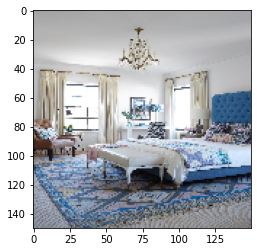

In [21]:
uploaded = files.upload()
 
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)

    if classes==0:
      print('\nStatus : Ruangan Rapi\n')
    else:
      print('\nStatus : Ruangan Berantakan\n')